In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import h5py
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


### PART A

##### Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [261]:
signal_df = pd.read_csv("signal.csv")
signal_df


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##### Q1 B - Check for missing values and print percentage for each attribute.

In [262]:
# Assuming 'df' is your DataFrame
missing_data = signal_df.isnull().sum()  # Count missing values for each attribute
total_data = signal_df.isnull().count()  # Count total values for each attribute
missing_percentage = (missing_data / total_data) * 100  # Calculate the percentage of missing values

# Create a new DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Total Values': total_data,
    'Missing Percentage': missing_percentage
})

# Print the missing information
print(missing_info)

                 Missing Values  Total Values  Missing Percentage
Parameter 1                   0          1599                 0.0
Parameter 2                   0          1599                 0.0
Parameter 3                   0          1599                 0.0
Parameter 4                   0          1599                 0.0
Parameter 5                   0          1599                 0.0
Parameter 6                   0          1599                 0.0
Parameter 7                   0          1599                 0.0
Parameter 8                   0          1599                 0.0
Parameter 9                   0          1599                 0.0
Parameter 10                  0          1599                 0.0
Parameter 11                  0          1599                 0.0
Signal_Strength               0          1599                 0.0


##### Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [263]:
# Identify and impute duplicate positions
duplicates = signal_df[signal_df.duplicated()]
print(duplicates)
signal_df = signal_df.drop_duplicates(keep='first')
signal_df.shape

      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780      

(1359, 12)

In [264]:
#check for any duplicates still exists
duplicates = signal_df[signal_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []


##### Q1 D - Visualise distribution of the target variable.

<Axes: xlabel='Signal_Strength', ylabel='Count'>

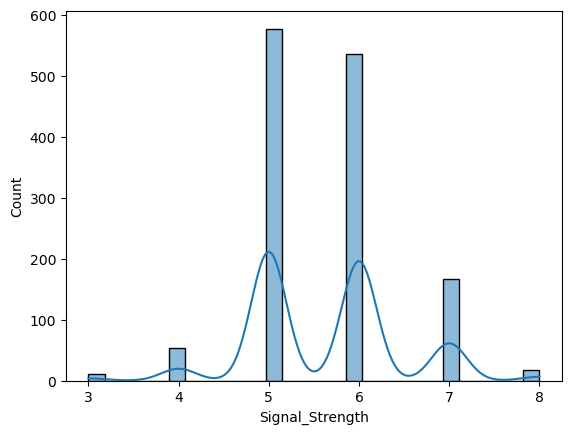

In [265]:
sns.histplot(signal_df['Signal_Strength'],kde=True)

##### Q1 E - Share insights from the initial data analysis (at least 2).

<Axes: >

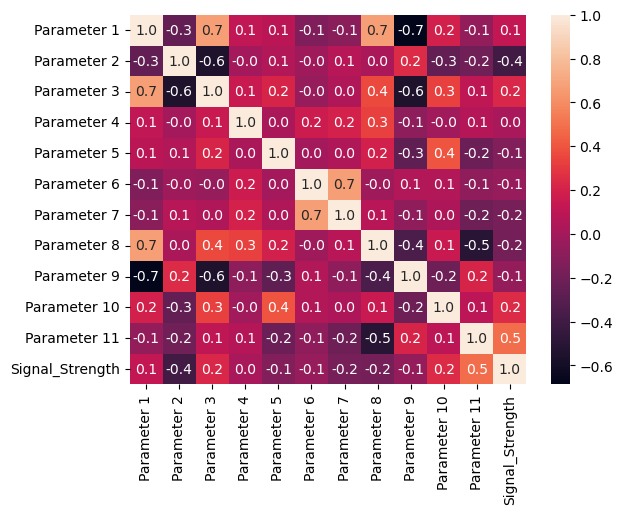

In [267]:
sns.heatmap(signal_df.corr(),annot=True, fmt=".1f")

1.  Signal Strength target variable has values ranging from 3 to 8
2.  From the above heatmap Signal_Strength has highest correlation with Parameter 11 Column values.
3.  From the above heatmap Signal_Strength has lowest correlation with Parameter 2 Column values.
4.  Signal_Strength 5 has highest count
5.  Signal_Strength 3 has lowest count.

##### Q2 A - Split the data into X & Y.

In [271]:
X = signal_df.drop('Signal_Strength',axis=1)
Y = signal_df['Signal_Strength']

print(X.shape)
print(Y.shape)

(1359, 11)
(1359,)


##### Q2 B - Split the data into train & test with 70:30 proportion.

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

##### Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [273]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)
print("Percentage of Train Data",round(X_train.shape[0]/X.shape[0]*100))
print("Percentage of Test Data",round(y_test.shape[0]/X.shape[0]*100))

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)
Percentage of Train Data 70
Percentage of Test Data 30


##### Q2 D - Normalise the train and test data with appropriate method.

In [274]:
X_train = X_train/255
X_test = X_test/255

##### Q2 E - Transform Labels into format acceptable by Neural Network

In [275]:
print(np.unique(signal_df['Signal_Strength']))
num_classes = 6

# Convert y_train and y_test to one-hot encoding
y_train_cat = to_categorical(y_train-3, num_classes)
y_test_cat = to_categorical(y_test-3,num_classes)


[3 4 5 6 7 8]


##### Q3 A - Design a Neural Network to train a classifier.

In [276]:
# create model
model = Sequential()
      #Adding the hidden and output layers
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(6, activation = 'softmax'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
adam = optimizers.Adam(0.001)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [277]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 256)               3072      
                                                                 
 dense_156 (Dense)           (None, 128)               32896     
                                                                 
 dense_157 (Dense)           (None, 64)                8256      
                                                                 
 dense_158 (Dense)           (None, 32)                2080      
                                                                 
 dense_159 (Dense)           (None, 6)                 198       
                                                                 
Total params: 46502 (181.65 KB)
Trainable params: 46502 (181.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Q3 B - Train the classifier using previously designed Architecture

In [281]:
history = model.fit(X_train,y_train_cat,batch_size=64,epochs=10,verbose=1,validation_split = 0.2)

Epoch 1/10
12/12 [==============================] - 0s 11ms/step - loss: 1.0951 - accuracy: 0.5145 - val_loss: 1.2381 - val_accuracy: 0.4503
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0930 - accuracy: 0.5250 - val_loss: 1.2296 - val_accuracy: 0.4607
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0744 - accuracy: 0.5368 - val_loss: 1.2302 - val_accuracy: 0.4660
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0794 - accuracy: 0.5171 - val_loss: 1.2244 - val_accuracy: 0.4712
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0798 - accuracy: 0.5145 - val_loss: 1.2231 - val_accuracy: 0.4712
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0759 - accuracy: 0.5158 - val_loss: 1.2310 - val_accuracy: 0.4974
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 1.0703 - accuracy: 0.5329 - val_loss: 1.2246 - val_accuracy: 0.4817
Epoch 8/10
12/12 [=

##### Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy

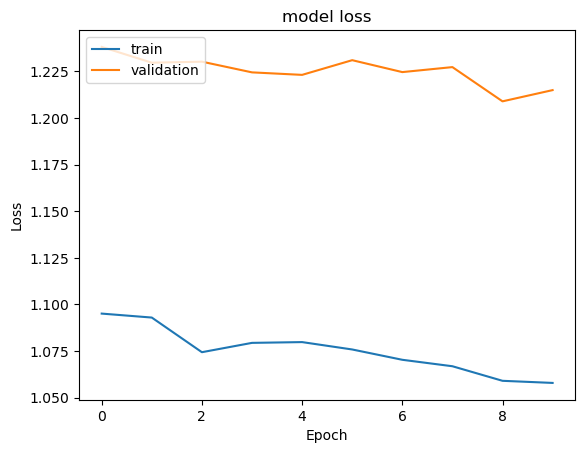

In [282]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

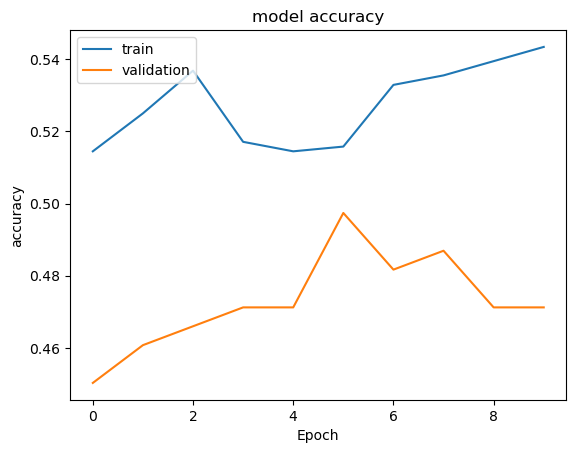

In [290]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [284]:
def create_model(batch_size=32):
    model = Sequential()
    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
    model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [285]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)]
keras_estimator  = KerasClassifier(model=create_model, callbacks=callbacks)

param_dist = {
    'batch_size': [16, 32, 64, 128, 256]}

kfold_splits = 3

random= GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_random,n_jobs=-1)

In [286]:
random_result = random.fit(X_train, y_train_cat,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 3 candidates, totalling 9 fits
6/6 [==============================] - 1s 52ms/step - loss: 1.6655 - accuracy: 0.3882 - val_loss: 1.5330 - val_accuracy: 0.4293
Best: 0.438486 using {'batch_size': 128}


In [287]:
estimator_1=create_model(batch_size=random_result.best_params_['batch_size'])

estimator_1.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 256)               3072      
                                                                 
 dense_166 (Dense)           (None, 128)               32896     
                                                                 
 dense_167 (Dense)           (None, 64)                8256      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_168 (Dense)           (None, 32)                2080      
                                                                 
 dense_169 (Dense)           (None, 6)                 198       
                                                                 
Total params: 46502 (181.65 KB)
Trainable params: 465

In [288]:
optimizer = optimizers.Adam(learning_rate=0.001)
estimator_1.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_1=estimator_1.fit(X_train, y_train_cat, epochs=50, batch_size = 32, validation_split=0.2)

Epoch 1/50
24/24 [==============================] - 2s 18ms/step - loss: 1.6738 - accuracy: 0.2368 - val_loss: 1.5338 - val_accuracy: 0.4555
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.3438 - accuracy: 0.4329 - val_loss: 1.3296 - val_accuracy: 0.4555
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1857 - accuracy: 0.4632 - val_loss: 1.2920 - val_accuracy: 0.4712
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1692 - accuracy: 0.4737 - val_loss: 1.2659 - val_accuracy: 0.4607
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1458 - accuracy: 0.4763 - val_loss: 1.2647 - val_accuracy: 0.4817
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1476 - accuracy: 0.4868 - val_loss: 1.2510 - val_accuracy: 0.4607
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1339 - accuracy: 0.5013 - val_loss: 1.2491 - val_accuracy: 0.4607
Epoch 8/50
24/24 [=

##### Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

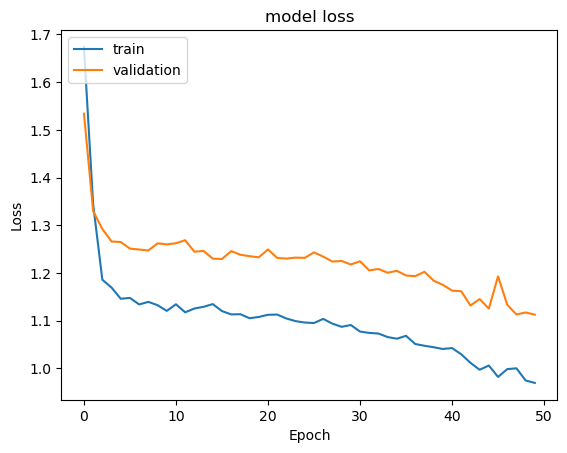

In [289]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

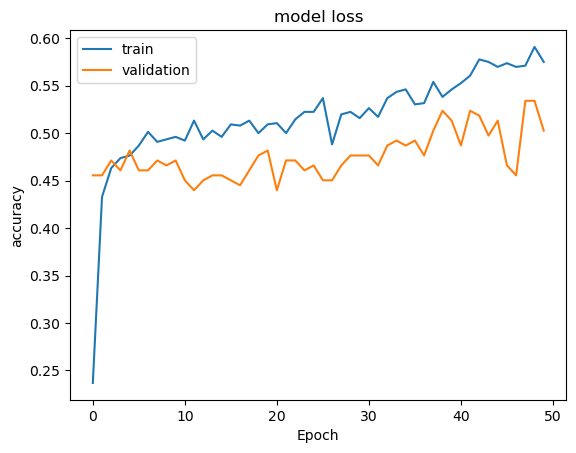

In [291]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

First model built shows that the training data is overfitted as the validation data perfomred poor. Loss of validation data is much higher than training data and accuracy is poor. When the model is improvised with hyperparamters and after performing gridsearch on the model difference between loss and accuracy of the validation and training data reduced substantially. Second model shows improvement as the training data results are closer to the validation data results.


### PART B

##### Q1 A - Read the .h5 file and assign to a variable.
##### Q1 B - Print all the keys from the .h5 file.
##### Q1 C - Split the data into X_train, X_test, Y_train, Y_test


In [293]:
file_path = "Autonomous_Vehicles_SVHN_single_grey1.h5"  

h5_file = h5py.File(file_path, "r")

# Get the names of all datasets and groups in the file
dataset_names = list(h5_file.keys())

print("Datasets and Groups in the HDF5 file:")
for name in dataset_names:
    print(name)


Datasets and Groups in the HDF5 file:
X_test
X_train
X_val
y_test
y_train
y_val


##### Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [294]:
dataset_x_train = np.array(h5_file['X_train'])
print(dataset_x_train.shape)

dataset_x_test = np.array(h5_file['X_test'])
print(dataset_x_test.shape)

dataset_y_train = np.array(h5_file['y_train'])
print(dataset_y_train.shape)

dataset_y_test = np.array(h5_file["y_test"])
print(dataset_y_test.shape)



(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


##### Q2 B - Visualise first 10 images in train data and print its corresponding labels.

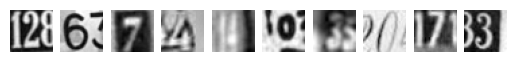

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [295]:
num_images_to_visualize = 10
for i in range(num_images_to_visualize):
    image = dataset_x_train[i]  # Access an image from the dataset
    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap='gray')  # You may need to adjust the colormap
    plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (dataset_y_train[0:10]))


##### Q2 C -Reshape all the images with appropriate shape update the data in same variable.

In [296]:
# Flatten the images
image_vector_size = 32*32
dataset_x_train = dataset_x_train.reshape(dataset_x_train.shape[0], image_vector_size)
dataset_x_test = dataset_x_test.reshape(dataset_x_test.shape[0], image_vector_size)
print(dataset_x_train.shape)
print(dataset_x_test.shape)

(42000, 1024)
(18000, 1024)


##### Q2 D - Normalise the images i.e. Normalise the pixel values.

In [297]:
dataset_x_train = (dataset_x_train)/255
dataset_x_test = (dataset_x_test)/255


##### Q2 E - Transform Labels into format acceptable by Neural Network
##### Q2 F - Print total Number of classes in the Dataset.

In [298]:
# Convert to "one-hot" vectors using the to_categorical function
print(np.unique(dataset_y_train[:]))
num_classes = 10
dataset_y_train_cat = to_categorical(dataset_y_train, num_classes)
dataset_y_test_cat = to_categorical(dataset_y_test,num_classes)
dataset_y_train_cat.shape

[0 1 2 3 4 5 6 7 8 9]


(42000, 10)

In [299]:
print("First 5 training lables as one-hot encoded vectors:\n", dataset_y_train_cat[:10])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


##### Design a Neural Network to train a classifier.

In [300]:
# define model

image_size=32*32
# create model
model = Sequential()  

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(10, activation='softmax')) ### For multiclass classification Softmax is used

In [301]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [302]:
## Looking into our base model
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 256)               262400    
                                                                 
 dense_171 (Dense)           (None, 64)                16448     
                                                                 
 dense_172 (Dense)           (None, 64)                4160      
                                                                 
 dense_173 (Dense)           (None, 32)                2080      
                                                                 
 dense_174 (Dense)           (None, 10)                330       
                                                                 
Total params: 285418 (1.09 MB)
Trainable params: 285418 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [303]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

##### Train the classifier using previously designed Architecture (Use best suitable parameters)

In [304]:

history=model.fit(dataset_x_train, dataset_y_train_cat, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)


Epoch 1/10

Epoch 1: saving model to model_weights.h5
263/263 - 3s - loss: 2.3102 - accuracy: 0.1053 - val_loss: 2.2975 - val_accuracy: 0.1124 - lr: 0.0010 - 3s/epoch - 12ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
263/263 - 2s - loss: 2.1701 - accuracy: 0.1890 - val_loss: 1.9491 - val_accuracy: 0.2896 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
263/263 - 2s - loss: 1.7162 - accuracy: 0.3876 - val_loss: 1.5839 - val_accuracy: 0.4426 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
263/263 - 2s - loss: 1.4723 - accuracy: 0.4994 - val_loss: 1.3914 - val_accuracy: 0.5205 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
263/263 - 2s - loss: 1.3018 - accuracy: 0.5674 - val_loss: 1.3131 - val_accuracy: 0.5644 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
263/263 - 2s - loss: 1.2299 - accuracy: 0.5994 - val_lo

563/563 [==============================] - 1s 2ms/step - loss: 1.0191 - accuracy: 0.6848
Test accuracy: 0.6848333477973938


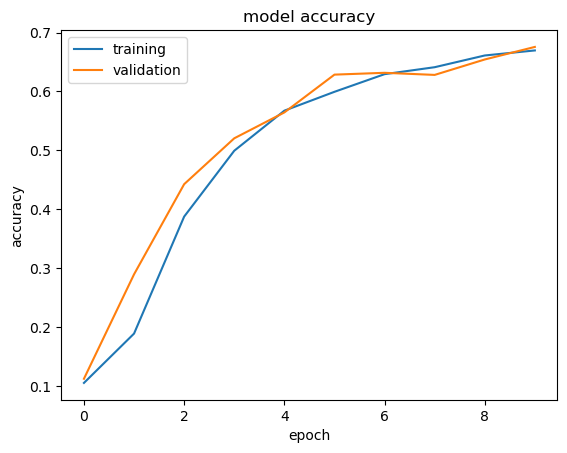

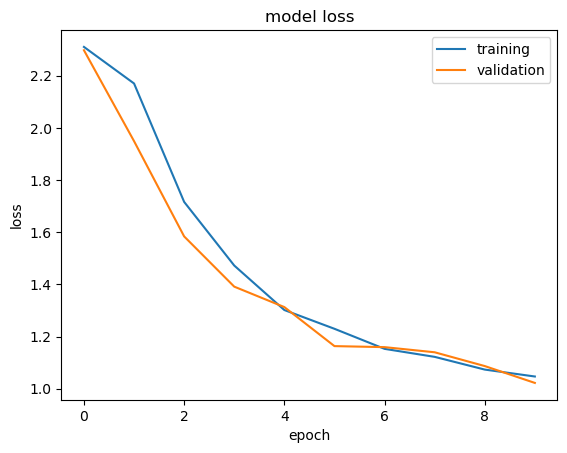

In [305]:
test_loss, test_accuracy = model.evaluate(dataset_x_test, dataset_y_test_cat)
print("Test accuracy:", test_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


In [306]:
# predicting the model on test data
y_pred_test=model.predict(dataset_x_test)
y_pred_test[0]

563/563 [==============================] - 1s 2ms/step


array([0.20807923, 0.06811848, 0.1631341 , 0.05459398, 0.07902206,
       0.04890481, 0.0470659 , 0.06553304, 0.09455664, 0.17099166],
      dtype=float32)

In [307]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred_test:
  y_pred_final.append(np.argmax(i))
y_pred_final[0]

0

In [308]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(dataset_y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1814
           1       0.66      0.73      0.70      1828
           2       0.77      0.67      0.71      1803
           3       0.58      0.71      0.64      1719
           4       0.74      0.78      0.76      1812
           5       0.65      0.61      0.63      1768
           6       0.74      0.65      0.69      1832
           7       0.67      0.77      0.72      1808
           8       0.71      0.54      0.61      1812
           9       0.68      0.65      0.67      1804

    accuracy                           0.68     18000
   macro avg       0.69      0.68      0.68     18000
weighted avg       0.69      0.68      0.68     18000



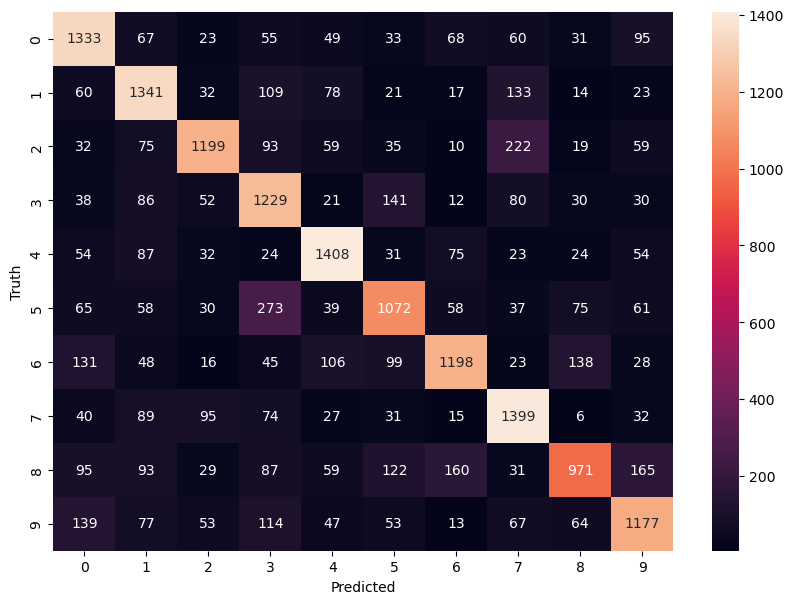

In [309]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(dataset_y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [310]:
index = 0
misclassified_images = []
for label, predict in zip(dataset_y_test, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(len(misclassified_images))
print(misclassified_images)


5673
[0, 1, 7, 8, 10, 11, 14, 17, 18, 19, 23, 26, 27, 29, 33, 40, 44, 45, 46, 51, 55, 56, 57, 58, 67, 68, 75, 76, 78, 84, 85, 89, 90, 92, 96, 98, 100, 102, 103, 108, 111, 114, 120, 126, 127, 132, 136, 137, 138, 140, 142, 145, 150, 151, 152, 154, 155, 158, 161, 162, 163, 165, 167, 170, 175, 177, 182, 184, 185, 186, 188, 194, 197, 200, 203, 210, 217, 222, 223, 232, 235, 239, 244, 246, 251, 252, 253, 267, 268, 270, 272, 274, 278, 284, 301, 302, 303, 305, 307, 317, 319, 322, 323, 324, 330, 338, 340, 346, 347, 351, 353, 355, 356, 360, 363, 366, 370, 371, 372, 374, 383, 392, 396, 398, 400, 402, 403, 404, 406, 408, 411, 415, 418, 426, 432, 434, 436, 437, 438, 446, 448, 450, 451, 452, 454, 456, 457, 460, 464, 466, 481, 485, 489, 492, 494, 496, 497, 498, 503, 504, 505, 507, 508, 510, 511, 516, 517, 518, 520, 523, 524, 527, 530, 532, 534, 535, 537, 542, 543, 546, 547, 551, 552, 555, 556, 560, 562, 563, 570, 579, 586, 590, 591, 592, 597, 600, 604, 607, 612, 614, 615, 617, 619, 620, 621, 630, 633,

In [311]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

image_size=32*32

# create model
model_1 = Sequential()  

model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))## Weight Initialization
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [312]:
# Compile model
#adam = optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [313]:
model_1.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 256)               262400    
                                                                 
 dense_176 (Dense)           (None, 64)                16448     
                                                                 
 dense_177 (Dense)           (None, 64)                4160      
                                                                 
 dense_178 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_179 (Dense)           (None, 10)                330       
                                                     

In [314]:
checkpoint = ModelCheckpoint("model_weights_1.h5",monitor='val_accuracy',
                            save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [315]:
history=model_1.fit(dataset_x_train, dataset_y_train_cat, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights_1.h5
263/263 - 4s - loss: 2.2743 - accuracy: 0.1441 - val_loss: 3.3371 - val_accuracy: 0.1018 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 2/10

Epoch 2: saving model to model_weights_1.h5
263/263 - 2s - loss: 1.8747 - accuracy: 0.3173 - val_loss: 1.7049 - val_accuracy: 0.4160 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 3/10

Epoch 3: saving model to model_weights_1.h5
263/263 - 2s - loss: 1.4705 - accuracy: 0.5157 - val_loss: 1.5214 - val_accuracy: 0.4802 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 4/10

Epoch 4: saving model to model_weights_1.h5
263/263 - 2s - loss: 1.2689 - accuracy: 0.5938 - val_loss: 1.2922 - val_accuracy: 0.5658 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 5/10

Epoch 5: saving model to model_weights_1.h5
263/263 - 2s - loss: 1.1431 - accuracy: 0.6393 - val_loss: 1.3345 - val_accuracy: 0.5723 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 6/10

Epoch 6: saving model to model_weights_1.h5
263/263 - 2s - loss: 1.0796 - accuracy: 0.6

##### Q3 C - Evaluate performance of the model with appropriate metrics.
##### Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

563/563 [==============================] - 1s 2ms/step - loss: 1.1336 - accuracy: 0.6514
Test accuracy: 0.6514444351196289
Test loss: 1.1336491107940674


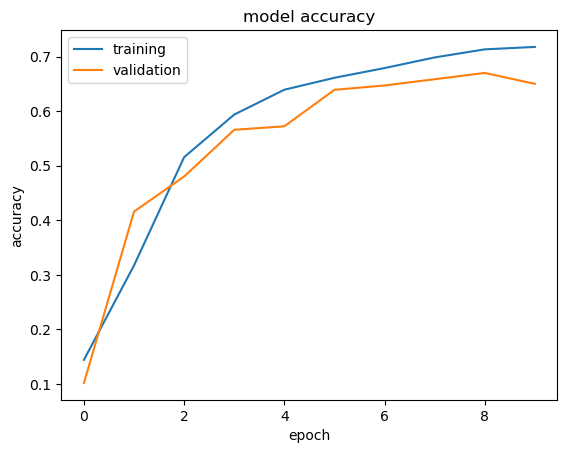

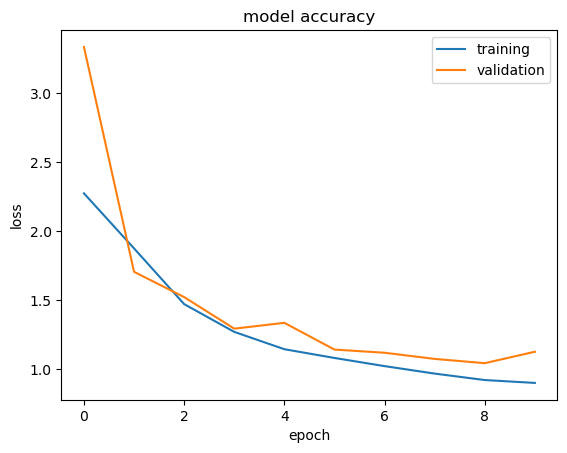

In [316]:
test_loss, test_accuracy = model_1.evaluate(dataset_x_test, dataset_y_test_cat)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


In [317]:
# predicting the model on test data
y_pred_test_1=model_1.predict(dataset_x_test)
y_pred_test_1[0]

563/563 [==============================] - 1s 2ms/step


array([0.23246412, 0.02451909, 0.09899371, 0.05289024, 0.10312872,
       0.03321385, 0.10761459, 0.00981156, 0.282919  , 0.05444507],
      dtype=float32)

In [318]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final_1=[]
for i in y_pred_test_1:
  y_pred_final_1.append(np.argmax(i))
y_pred_final_1[0]

8

In [319]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(dataset_y_test,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1814
           1       0.82      0.51      0.63      1828
           2       0.71      0.72      0.72      1803
           3       0.65      0.68      0.66      1719
           4       0.47      0.89      0.61      1812
           5       0.80      0.53      0.64      1768
           6       0.62      0.73      0.67      1832
           7       0.88      0.58      0.70      1808
           8       0.50      0.76      0.60      1812
           9       0.90      0.47      0.62      1804

    accuracy                           0.65     18000
   macro avg       0.71      0.65      0.65     18000
weighted avg       0.71      0.65      0.65     18000



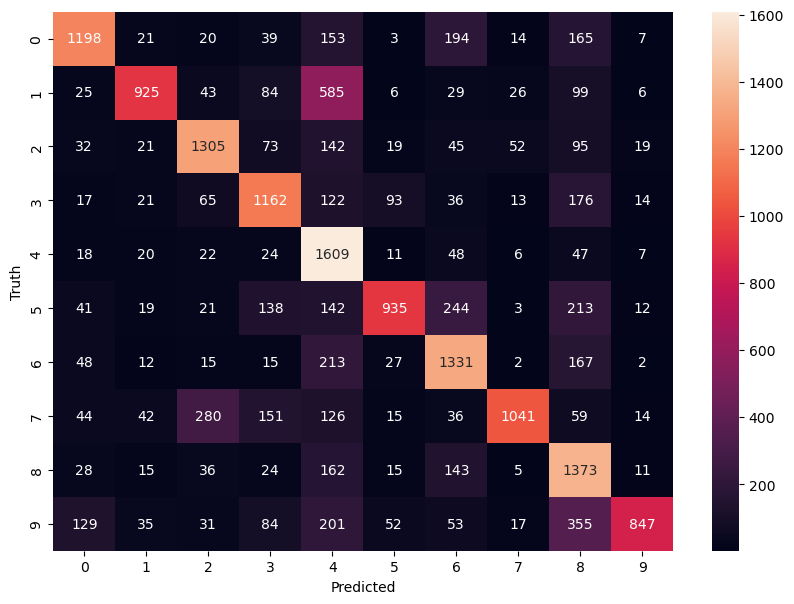

In [320]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(dataset_y_test,y_pred_final_1)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [321]:
index = 0
misclassified_images = []
for label, predict in zip(dataset_y_test, y_pred_final_1):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

print(len(misclassified_images))
print(misclassified_images)


6274
[0, 1, 6, 8, 11, 12, 14, 18, 23, 24, 25, 26, 27, 29, 33, 37, 40, 45, 46, 50, 56, 58, 59, 62, 64, 67, 68, 78, 88, 90, 92, 93, 96, 97, 100, 106, 108, 114, 120, 122, 125, 127, 132, 136, 137, 138, 143, 145, 148, 150, 151, 154, 155, 158, 159, 160, 161, 162, 163, 170, 175, 176, 178, 182, 183, 184, 185, 186, 188, 189, 194, 199, 200, 203, 206, 210, 222, 223, 228, 232, 234, 235, 237, 238, 239, 242, 244, 246, 251, 252, 253, 255, 256, 266, 267, 270, 275, 278, 288, 290, 300, 301, 302, 303, 304, 305, 307, 308, 317, 318, 319, 323, 337, 339, 346, 347, 351, 353, 354, 356, 366, 370, 372, 375, 380, 389, 392, 395, 396, 401, 402, 404, 406, 407, 411, 415, 418, 421, 422, 425, 426, 428, 432, 434, 437, 446, 448, 451, 453, 454, 456, 457, 466, 469, 480, 481, 482, 484, 485, 490, 492, 496, 497, 498, 502, 503, 504, 507, 508, 510, 511, 514, 516, 520, 523, 524, 525, 527, 530, 531, 532, 535, 537, 541, 542, 550, 551, 552, 556, 560, 562, 563, 564, 565, 576, 579, 581, 582, 586, 589, 590, 592, 600, 604, 607, 608, 61

##### Summary
1. We can observe from our both models that model with batch normalization is performing better .
2. However, the accuracy curve for train and validation shows that our model with batch normalization is much less an overfit.
3. We achieved higher accuracy and lower loss with batch normalization.
4. Acheived higher precision using batch normalization.
5. Misclassified images with Batch normalization are higher 6274 than without batch normalization 5673